# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import nb_black

%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
nyc_pumpkins = pd.read_csv("./data/new-york_9-24-2016_9-30-2017.csv")
cat_map = {
    "sml": 0,
    "med": 1,
    "med-lge": 2,
    "lge": 3,
    "xlge": 4,
    "exjbo": 5
}

nyc_pumpkins = nyc_pumpkins.assign(
    size=nyc_pumpkins["Item Size"].map(cat_map),
    price=nyc_pumpkins["High Price"] + nyc_pumpkins["Low Price"] / 2,
    size_class=(nyc_pumpkins["Item Size"].map(cat_map) >= 2).astype(int)
)
nyc_pumpkins = nyc_pumpkins.drop([c for c in nyc_pumpkins if c not in ["size", "price", "size_class"]], axis="columns")

nyc_pumpkins = nyc_pumpkins.dropna()

<IPython.core.display.Javascript object>

In [3]:
nyc_pumpkins.head(10)

,size,price,size_class
0,4.0,245.0,1
1,3.0,245.0,1
2,4.0,215.0,1
3,3.0,215.0,1
4,2.0,200.0,1
5,4.0,245.0,1
6,3.0,230.0,1
7,1.0,280.0,0
8,4.0,245.0,1
9,3.0,245.0,1


<IPython.core.display.Javascript object>

In [4]:
nyc_pumpkins.shape

(104, 3)

<IPython.core.display.Javascript object>

<ipython-input-5-fad4f15870b0>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pipeline.fit(X_train[:, np.newaxis], y_train)
<ipython-input-5-fad4f15870b0>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  predicted_sizes = np.round(pipeline.predict(X_test[:, np.newaxis]))
<ipython-input-5-fad4f15870b0>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pipeline.fit(X_train[:, np.newaxis], y_train)
<ipython-input-5-fad4f15870b0>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a num

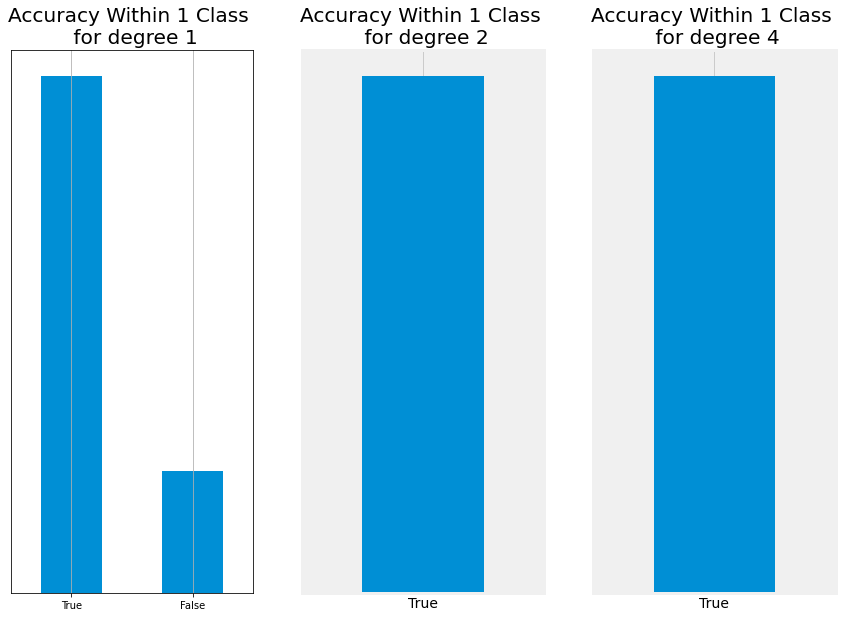

<IPython.core.display.Javascript object>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nyc_pumpkins["price"], nyc_pumpkins["size"], test_size=0.20, random_state=42, shuffle=True)

degrees = [1, 2, 4]
fig = plt.figure(figsize=(20, 10))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees)+1, i + 2)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
    include_bias=True)

    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
    ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Evaluate the models using crossvalidation
    predicted_sizes = np.round(pipeline.predict(X_test[:, np.newaxis]))
    plt.style.use("fivethirtyeight")

    pd.Series(
        np.abs((np.array(y_test) - predicted_sizes).flatten()) <= 1
    ).value_counts().plot.bar(title="Accuracy Within 1 Class \n for degree {}".format(degrees[i]))

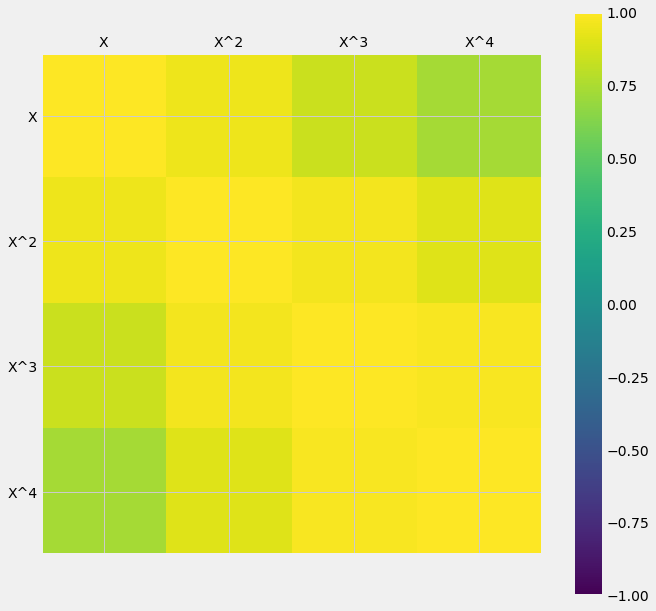

<IPython.core.display.Javascript object>

In [6]:
correlations = pd.DataFrame(PolynomialFeatures(degree=4, include_bias=False).fit_transform(np.array(nyc_pumpkins["price"]).reshape(-1, 1))).corr()

# Plot correlation matrix
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(["X", "X^2", "X^3", "X^4"])
ax.set_yticklabels(["X", "X^2", "X^3", "X^4"])
plt.show()

<ipython-input-7-83e54817548c>:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pipeline.fit(X_train[:, np.newaxis], y_train)
<ipython-input-7-83e54817548c>:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  predicted_sizes = np.round(pipeline.predict(X_test[:, np.newaxis]))
<ipython-input-7-83e54817548c>:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pipeline.fit(X_train[:, np.newaxis], y_train)
<ipython-input-7-83e54817548c>:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a num

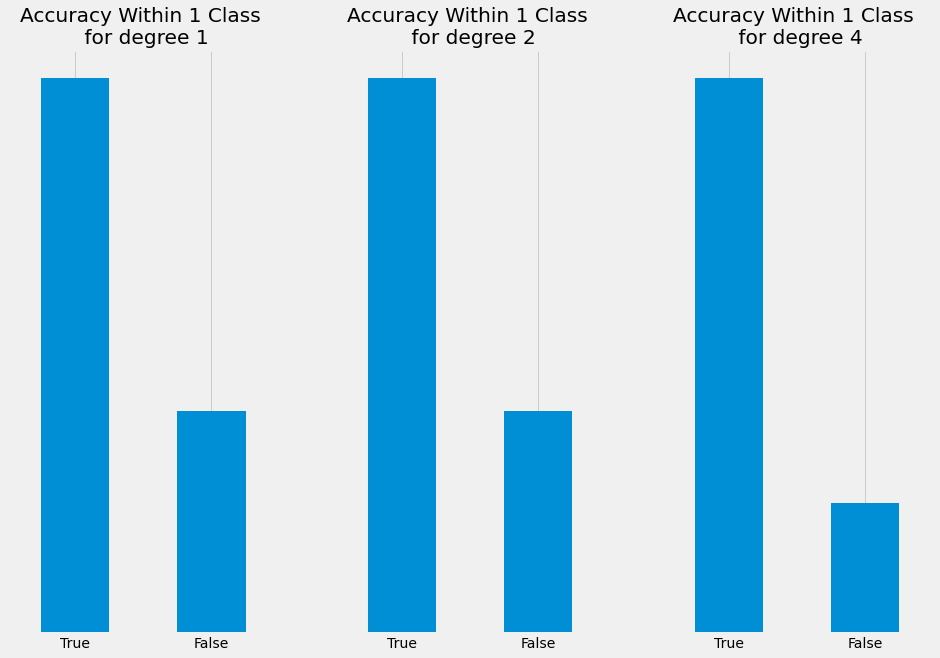

<IPython.core.display.Javascript object>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(nyc_pumpkins["price"], nyc_pumpkins["size"], test_size=0.20, random_state=42, shuffle=True)

X_train[20] = -10
y_train[20] = 30

degrees = [1, 2, 4]
fig = plt.figure(figsize=(20, 10))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees)+1, i + 2)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=True)

    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
    ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Evaluate the models using cross validation
    predicted_sizes = np.round(pipeline.predict(X_test[:, np.newaxis]))
    plt.style.use("fivethirtyeight")

    pd.Series(
        np.abs((np.array(y_test) - predicted_sizes).flatten()) <= 1
    ).value_counts().plot.bar(title="Accuracy Within 1 Class \n for degree {}".format(degrees[i]))